In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## running the model

In [3]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 100, 'lr': 0.02, 'momentum': 0.25, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'dimension': 25, 'verbose': 1, 'conv1_dim': 5, 'conv1_kernel_size': 5, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'crop': 200, 'size': 128, 'mean': 0.35, 'std': 0.4}


In [4]:
#!rm {path}

In [5]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 786 sample images;  629  to train 157 to test
Loading file _Regard.pt


## testing the model

In [6]:
Accuracy = ml.test()


Test set: Average loss: 0.2412, Accuracy: 151/157 (96%)



In [7]:
data, target = next(iter(ml.d.test_loader))

In [8]:
for j in target: print (j)

tensor(0)


In [9]:
data

tensor([[[[-0.6299, -0.6495, -0.6691,  ...,  0.5466,  0.7721,  0.9289],
          [-0.6201, -0.6495, -0.6985,  ...,  0.6152,  0.8015,  0.9289],
          [-0.5809, -0.6495, -0.7181,  ...,  0.6838,  0.8113,  0.9093],
          ...,
          [-0.2083, -0.2377, -0.2377,  ...,  1.1054,  1.1054,  1.1152],
          [-0.2181, -0.2475, -0.2574,  ...,  1.1152,  1.1250,  1.1642],
          [-0.2377, -0.2770, -0.2868,  ...,  1.1250,  1.1740,  1.2132]],

         [[-0.6593, -0.6691, -0.6789,  ...,  0.3407,  0.5564,  0.7034],
          [-0.6201, -0.6495, -0.6887,  ...,  0.4191,  0.5662,  0.6740],
          [-0.5809, -0.6397, -0.7181,  ...,  0.4877,  0.5760,  0.6446],
          ...,
          [-0.3162, -0.2966, -0.2868,  ...,  0.8015,  0.7819,  0.7623],
          [-0.2966, -0.2868, -0.2770,  ...,  0.7623,  0.7623,  0.7721],
          [-0.2672, -0.2868, -0.2868,  ...,  0.7328,  0.7721,  0.8113]],

         [[-0.7377, -0.7672, -0.7868,  ...,  0.3211,  0.5172,  0.6446],
          [-0.6985, -0.7279, -

target:right
pred  :center


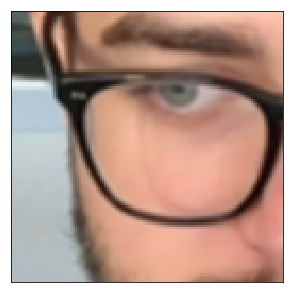

target:center
pred  :right


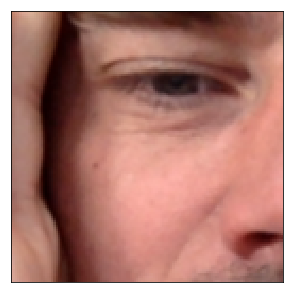

target:center
pred  :right


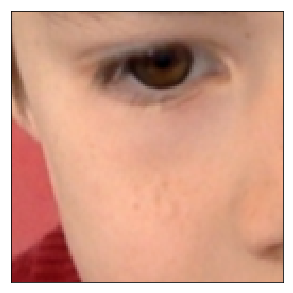

target:center
pred  :right


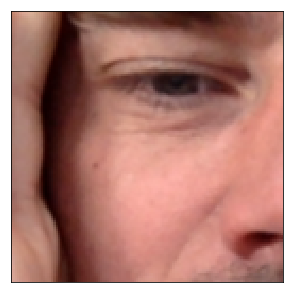

target:center
pred  :right


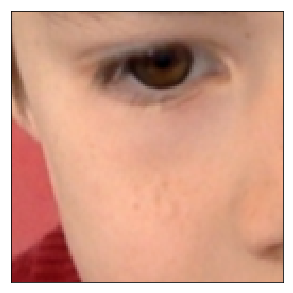

target:right
pred  :center


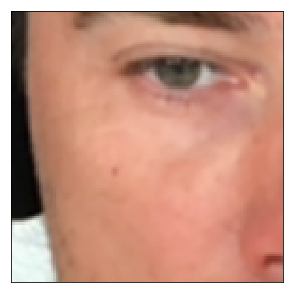

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


for data, labels in ml.d.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 

